<a href="https://colab.research.google.com/github/vishal-burman/PyTorch-Architectures/blob/master/modeling_AlexNet/test_sample_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install wget
! pip install datasets

In [ ]:
! rm -rf PyTorch-Architectures/
! git clone https://github.com/vishal-burman/PyTorch-Architectures.git

In [3]:
%cd PyTorch-Architectures/

/content/PyTorch-Architectures


In [4]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from modeling_AlexNet.model import AlexNet
from toolkit.custom_dataset_cv import DataLoaderCIFAR10Classification
from toolkit.utils import dict_to_device
from toolkit.trainer import Trainer

In [5]:
# Hyperparameters
INPUT_SIZE = 128
BATCH_SIZE = 128
LR = 0.0001
EPOCHS = 10

In [6]:
train_loader = DataLoaderCIFAR10Classification(resize=INPUT_SIZE, train=True)
train_loader = train_loader.return_dataloader(batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoaderCIFAR10Classification(resize=INPUT_SIZE, train=False)
valid_loader = valid_loader.return_dataloader(batch_size=BATCH_SIZE, shuffle=False)

print(f"Length of Train Loader --> {len(train_loader)}")
print(f"Length of Valid Loader --> {len(valid_loader)}")

cifar10 extracted...
cifar10 exists...
Length of Train Loader --> 391
Length of Valid Loader --> 79


In [7]:
# Sanity check DataLoader
for sample in train_loader:
  assert sample["pixel_values"].dim() == 4
  assert sample["pixel_values"].size(2) == INPUT_SIZE
  break

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = AlexNet(num_classes=10)
model.to(device)

params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Trainable Parameters --> {params}")

Trainable Parameters --> 57044810


In [9]:
# Sanity check forward pass
model.eval()
with torch.set_grad_enabled(False):
  for sample in train_loader:
    loss, logits = model(**dict_to_device(sample, device=device))
    print(f"Loss --> {loss.item(): .2f}")
    print(f"Logits Shape --> {logits.shape}")
    break

Loss -->  2.30
Logits Shape --> torch.Size([128, 10])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


  0%|          | 0/3910 [00:00<?, ?it/s]

********** Running Training **********
  Total Training Steps = 3910  
  Epochs = 10  
  Batch Size = 128  
  Length of Train DataLoader = 391  
  Length of Valid DataLoader = 79  

Epoch: 1 || Training Loss: 1.662 || cv_accuracy: 51.420

Gradient-Flow for epoch 1


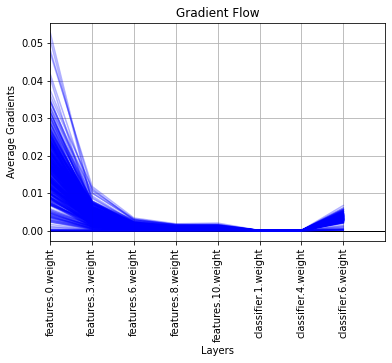


Epoch: 2 || Training Loss: 1.199 || cv_accuracy: 62.410

Gradient-Flow for epoch 2


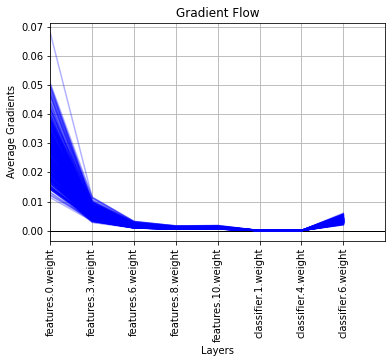


Epoch: 3 || Training Loss: 0.979 || cv_accuracy: 67.560

Gradient-Flow for epoch 3


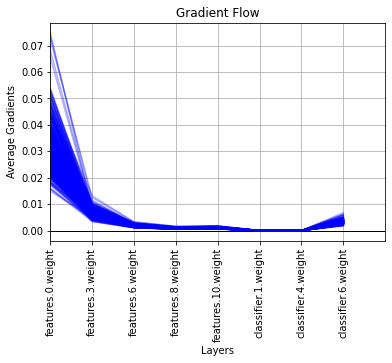


Epoch: 4 || Training Loss: 0.815 || cv_accuracy: 72.670

Gradient-Flow for epoch 4


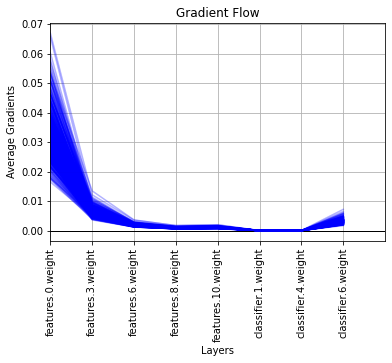


Epoch: 5 || Training Loss: 0.697 || cv_accuracy: 73.620

Gradient-Flow for epoch 5


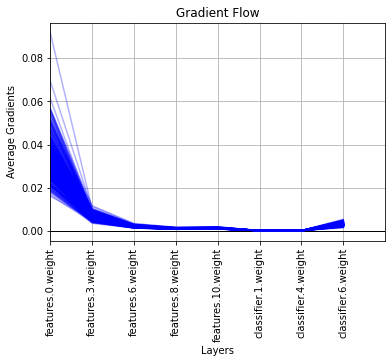


Epoch: 6 || Training Loss: 0.598 || cv_accuracy: 75.940

Gradient-Flow for epoch 6


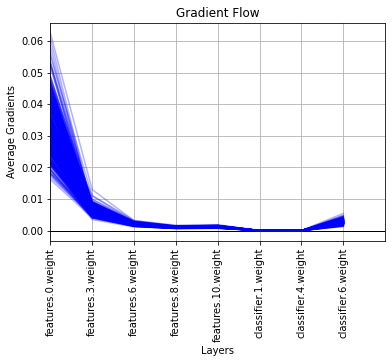


Epoch: 7 || Training Loss: 0.516 || cv_accuracy: 77.780

Gradient-Flow for epoch 7


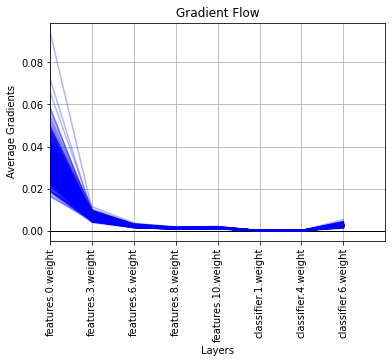


Epoch: 8 || Training Loss: 0.445 || cv_accuracy: 75.660

Gradient-Flow for epoch 8


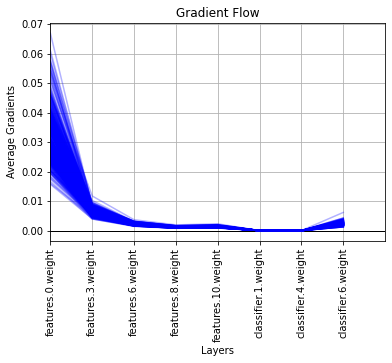


Epoch: 9 || Training Loss: 0.370 || cv_accuracy: 78.760

Gradient-Flow for epoch 9


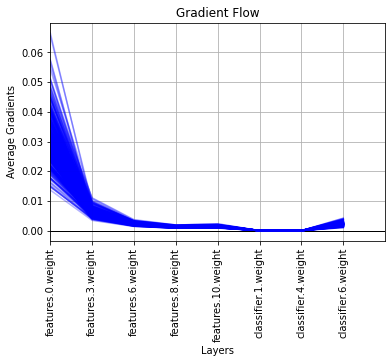


Epoch: 10 || Training Loss: 0.305 || cv_accuracy: 79.240

Gradient-Flow for epoch 10


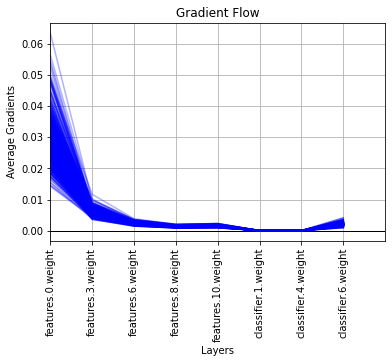

In [10]:
trainer = Trainer(model=model,
                  train_dataset=train_loader,
                  valid_dataset=valid_loader,
                  )
trainer.train(lr=LR, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              shuffle_train=True,
              scheduler=None,
              metric="cv_accuracy",
              show_grad_flow=True,
              )